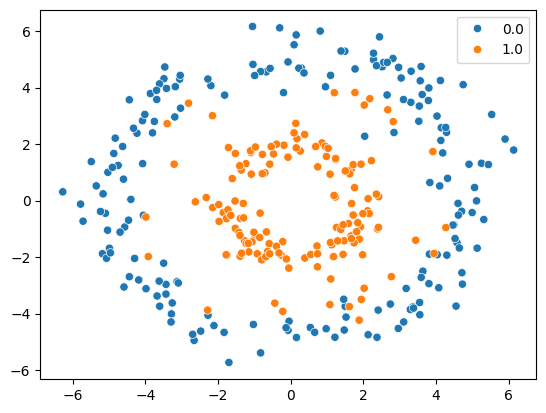

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline

# The dataset
# data = np.loadtxt('logistic_regression_data.csv', delimiter=',', dtype=np.float64)
data = np.loadtxt(
    'logistic_regression_data.csv',
    delimiter=',',
    skiprows=1
)
X, y = data[:, :-1], data[:, -1].reshape((-1, 1))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten())
plt.show()

In [4]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def loss(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    cost = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y)
    return cost

In [6]:
def gradient(theta, X, y):
  h = sigmoid(np.dot(X, theta))
  grad = np.dot(X.T, (h-y))/len(y)
  return grad

In [7]:
def expand_feature(x1, x2, power=2):
    # expand a 2D feature matrix to polynomial features up to the power
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1**(i - j) * (x2**j)).reshape(-1, 1), axis=1)
    return new_x

In [18]:
# def predict(theta, X):
#   return (sigmoid(np.dot(theta, X)) > 0.5).flatten()#
def predict(theta, X):
    print(f"theta shape: {theta.shape}")
    print(f"X shape: {X.shape}")

    # Check which dot product works
    try:
        z1 = np.dot(theta, X)
        print(f"np.dot(theta, X) shape: {z1.shape}")
    except:
        print("np.dot(theta, X) failed")

    try:
        z2 = np.dot(X, theta)
        print(f"np.dot(X, theta) shape: {z2.shape}")
    except:
        print("np.dot(X, theta) failed")

    return (sigmoid(np.dot(X, theta)) > 0.5).flatten()

In [19]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    costs = []
    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * np.dot(X.T, (h - y)) / m
        costs.append(loss(theta, X, y))
    return theta, costs

In [20]:
def logistic_regression(X, y, power=2, alpha=0.01, num_iters=1000):
    X = expand_feature(X[:, 0], X[:, 1], power=power)
    theta = np.zeros((X.shape[1], 1), dtype=np.float64)
    theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

In [21]:
power, num_iters = 20, 20000
predicted, theta, costs = logistic_regression(X, y, power=power, alpha=0.6, num_iters=num_iters)

/tmp/ipython-input-3415309211.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-3269736926.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y)
/tmp/ipython-input-3269736926.py:3: RuntimeWarning: invalid value encountered in multiply
  cost = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y)


theta shape: (231, 1)
X shape: (325, 231)
np.dot(theta, X) failed
np.dot(X, theta) shape: (325, 1)


In [22]:
print("The accuracy is {:.2f} %".format(sum(predicted == y.flatten()) / len(y) * 100))

The accuracy is 93.85 %


/tmp/ipython-input-1121522821.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power=power), theta)


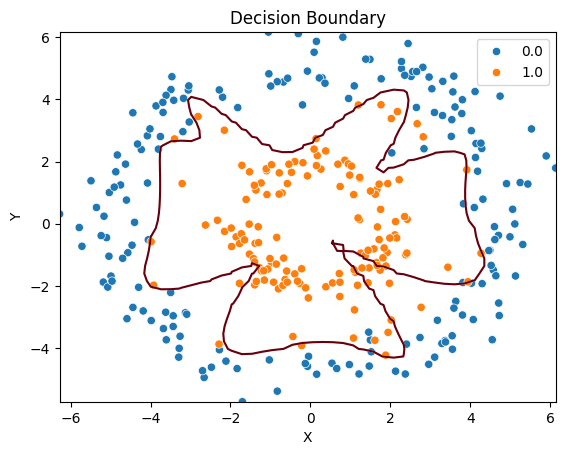

In [23]:
u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power=power), theta)
z = np.transpose(z)

plt.contour(u, v, z, [0, 0.01], cmap="Reds")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# With Regularization

In [24]:
def cost_reg(theta, X, y, lam=1):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0
    cost = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y) + lam * np.sum(theta1 * theta1) / len(y)
    return cost

In [25]:
def grad_reg(theta, X, y, lam=0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0
    grad = (np.dot(X.T, (h - y)) + 2 * lam * theta1) / len(y)
    return grad

In [26]:
def gradient_descent_reg(X, y, theta, alpha, lam=0, num_iters=100):
    m = len(y)
    costs = []

    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta1 = theta.copy()
        theta1[0] = 0
        theta -= alpha * (np.dot(X.T, (h - y)) + 2 * lam * theta1) / m
        costs.append(cost_reg(theta, X, y, lam))

    return theta, costs

In [27]:
def logistic_regression_reg(X, y, power=2, alpha=0.01, lam=0, num_iters=1000):
    X = expand_feature(X[:, 0], X[:, 1], power=power)
    theta = np.zeros((X.shape[1], 1), dtype=np.float64)
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

In [37]:
power, num_iters = 20, 20000
lam = 0.05
predicted, theta, costs = logistic_regression_reg(X, y, power=power, alpha=0.6, lam=lam, num_iters=num_iters)

/tmp/ipython-input-3415309211.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipython-input-3642253132.py:5: RuntimeWarning: divide by zero encountered in log
  cost = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y) + lam * np.sum(theta1 * theta1) / len(y)
/tmp/ipython-input-3642253132.py:5: RuntimeWarning: invalid value encountered in multiply
  cost = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h))) / len(y) + lam * np.sum(theta1 * theta1) / len(y)


theta shape: (231, 1)
X shape: (325, 231)
np.dot(theta, X) failed
np.dot(X, theta) shape: (325, 1)


In [38]:
print("The accuracy is {:.2f} %".format(sum(predicted == y.flatten()) / len(y) * 100))

The accuracy is 93.54 %


/tmp/ipython-input-1121522821.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power=power), theta)


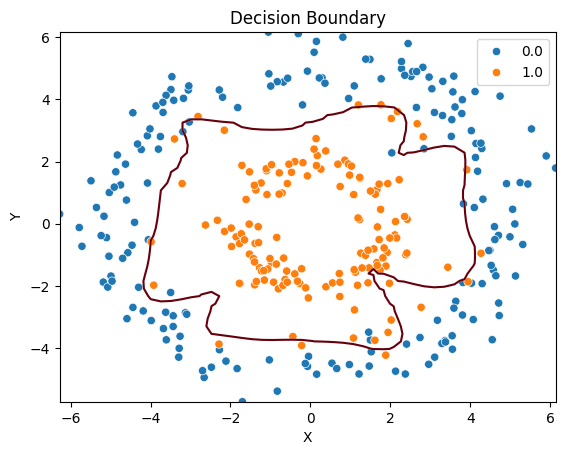

In [39]:
u = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
v = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)

z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(expand_feature(u[i].reshape(1, -1), v[j].reshape(1, -1), power=power), theta)
z = np.transpose(z)

plt.contour(u, v, z, [0, 0.01], cmap="Reds")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()